# LO vs. NLO simulation 

In this exercise we will get familiar with leading order (LO) and next-to-leading order (NLO) simulation. As you might know, beyond the tree level things can get messy. The NLO Feynman diagrams (diagrams with one loop) need to be taken into account and for instance the cross section calculation becomes harder. The NLO diagrams influence the experimental results as well. 

Your task this week is to analyse two datasets. One is a ttbar process (any process that produces a top quark and an anti-top quark) simulated in LO and the other is a ttbar process in NLO. These simulations have been made in the framework of CMS detector by following the circumstances of 2016 data taking. This means that we are looking at proton-proton collisions with $\sqrt{s}$ = 13 TeV center-of-mass energy. 

In the normalisation use need to know the theoretical cross section of the process. We assume the mass of the top quark to be 172.5 GeV.
The latest calculated theoretical cross section is then 831.76 pb.

In this exercise we are studying jets. Jets are collimated sprays of hadrons. Since the lifetime of a top quark is very short, it decays into a jet which is then measured. The difference of LO and NLO can be seen for instance in the jet distributions.

We have so far used csv files in our studies. In particle physics however we use quite a lot of .root files. Therefore we will get familiar with .root files in this exercise as well. Below is an example of how to read and loop over the data. Note that the data is nested. Each particle collision event may create multiple jets. To find the data for each jet separately one must have two nested loops, one looping over the events and the other looping through the jets of the event.

An example of going through the data can be seen below. It saves the transverse momenta of all jets (using a variable called Jets_pt_MCjet) into an array called pts.

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Read the data sets tt_LO.csv and tt_NLO.csv

f_NLO = uproot.open('tt_NLO.root')

tree_NLO = f_NLO.get('Events')

f_LO = uproot.open('tt_LO.root')

tree_LO = f_LO.get('Events')

#Here is an example how to loop over all jet pTs.

pts = []

for jets_pt in tree_NLO.array('Jets_pt_MCjet'): 
  i = 0
  for pt in jets_pt:
    i = i+1
    pts.append(pt)

print('The pT of the first jet is', pts[0]) # 132.37...

The pT of the first jet is 132.36965942382812


The first task is to plot the numbers of jets per event in a histogram and compare the obtained distributions for LO and NLO.

IMPORTANT: The simulated events need to be weighted. Each event has a weight assigned to it which can be found using variable GenWeight. Use these as input for the argument 'weights' when plotting the histogram using numpy.hist. Also normalize the histograms since the two data sets have different amounts of events.

Note that the NLO simulation has negative weights.The negative weights are an artifact of the cross section calculation. There some terms get a negative weight from a fermion loop. 

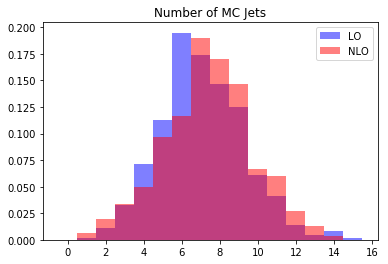

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Plot the number of MC jets after cuts for LO and NLO

weights_jets_NLO = []
weights_jets_LO = []
jets_per_event_NLO = []
jets_per_event_LO = []

for i in range(tree_NLO.array('Jets_pt_MCjet').shape[0]):
    jets_per_event_NLO.append(tree_NLO.array('Jets_pt_MCjet')[i].shape[0])
    weights_jets_NLO.append(tree_NLO.array('GenWeight')[i])
            

for i in range(tree_LO.array('Jets_pt_MCjet').shape[0]):
    jets_per_event_LO.append(tree_LO.array('Jets_pt_MCjet')[i].shape[0])
    weights_jets_LO.append(tree_LO.array('GenWeight')[i])
    

bins = np.arange(0, max(jets_per_event_LO) + 1.5) - 0.5
plt.hist(jets_per_event_LO, bins=bins, weights=weights_jets_LO, color='b', density=True, alpha=0.5, label='LO')
plt.hist(jets_per_event_NLO, bins=bins, weights=weights_jets_NLO, color='r', density=True, alpha=0.5, label='NLO')


plt.title('Number of MC Jets')
plt.legend()
plt.show()

Describe the differences between LO and NLO jet number distributions. **(We can add a more quantitative questions here)**

Next we will focus on the LO dataset.

Cut the dataset so that for the accepted jets the pseudorapidity $\eta$ is between -2.1 and 2.1. The variable is named Jets_eta_MCjet. Also require that the transverse momentum of the jets is between 30 and 150 (the variable is Jets_pt_MCjet). Plot the pT for the accepted events in a histogram. Again use the weights (all jets in the same event have the same weight) and normalize the pT distribution. Use 100 bins for the histogram

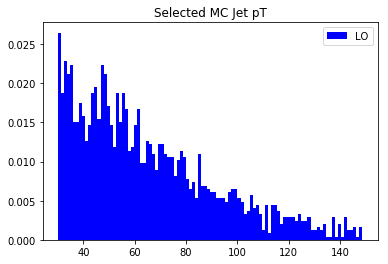

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Plot the jet pT after cuts for LO

NLO_pts = []
LO_pts = []
NLO_etas = []
LO_etas = []
number_of_jets = []
weights_jets_NLO = []
weights_jets_LO = []
weights_NLO = []
weights_LO = []
jets_per_event_NLO = []
jets_per_event_LO = []           

for i in range(tree_LO.array('Jets_pt_MCjet').shape[0]):
    for j in range(tree_LO.array('Jets_eta_MCjet')[i].shape[0]):
        eta = tree_LO.array('Jets_eta_MCjet')[i][j]
        pt = tree_LO.array('Jets_pt_MCjet')[i][j]
        if eta > -2.1 and eta < 2.1 and pt > 30 and pt < 150:
            LO_pts.append(pt)
            weights_LO.append(tree_LO.array('GenWeight')[i])

bin_no = 100
plt.hist(LO_pts, bins=bin_no, weights=weights_LO, color='b', density=True, label='LO')

plt.title('Selected MC Jet pT')
plt.legend()
plt.show()

The data is quite noisy but it should look like it could be reasonably modelled by an exponentially decaying function. Let's train curve fitting and try to fit an exponential curve $c_1e^{c_2x}$ to the data ($c_1$ and $c_2$ are constants). 

We have an example of using scipy.curve_fit in week 1, but here we can be smarter than that. The easiest way to do this is to realize that an exponential curve is just a straight line after taking a logarithm. Therefore you can take the logarithm of bin heights and fit a straight line $ax+b$ to them using [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) (fitting polynomials is in general quite easy and much less frustrating than arbitrary functions). The exponential curve is then $e^be^{ax}$. Check that the curve fits reasonably well to the data. Return the parameters $a$ and $b$ (do NOT return $e^b$ by accident).

[-0.02722224 -2.73740463]


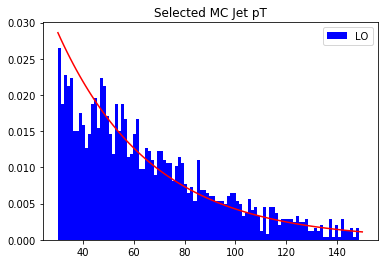

In [72]:
# Fit an exponential curve to the data. 

bars, counts, bins = plt.hist(LO_pts, bins=bin_no, weights=weights_LO, color='b', density=True, label='LO')

x = np.linspace(30, 150, bin_no)

par = np.polyfit(x, np.log(bars), 1)
print(par)
plt.plot(x, np.exp(par[1])*np.exp(par[0]*x), 'r')
plt.title('Selected MC Jet pT')
plt.legend()
plt.show()